In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
simulated_data = pd.read_csv('/Users/uqksaida/Desktop/UQ_work/AI distance indicators/TF_symbolic_regression/input/tully_fisher_simulated_dataset.csv')
simulated_data

,velocity_width,halo_mass,stellar_mass,distance,inclination,surface_brightness,galaxy_type,luminosity,absolute_magnitude,apparent_magnitude,corrected_velocity,true_absolute_magnitude,mass_correction,velocity_correction,distance_bias,observed_velocity,observed_magnitude,velocity_error,photometric_error,detectable
0,281.867005,3.323149e+12,8.736882e+11,33.442750,0.509234,20.987233,Spiral,3.561504e+11,-24.049084,8.572426,578.178478,-24.236085,0.194136,0.010628,-0.003493,576.848446,8.554628,-1.330032,0.016393,True
1,181.781928,7.158507e+11,1.355853e+11,65.573012,0.151823,21.783222,Spiral,1.329794e+12,-25.479461,8.604164,1201.942001,-25.559997,0.113221,0.030331,0.002355,1188.733079,8.604999,-13.208923,0.028009,True
2,312.850287,4.787105e+12,4.988409e+11,42.644438,1.068123,20.811370,Spiral,1.809603e+11,-23.313958,9.835354,357.013608,-23.481970,0.169796,0.003167,-0.001382,378.443679,9.824013,21.430071,0.017715,True
3,572.715521,3.973574e+13,2.541560e+12,23.423718,0.206246,21.538058,Spiral,4.915439e+12,-26.898906,4.949373,2796.638820,-27.080381,0.240510,0.065621,-0.006586,2791.941175,4.972735,-4.697645,0.015745,True
4,170.131207,5.677262e+11,9.196148e+10,35.005905,0.924964,19.159578,Dwarf,3.759409e+10,-21.607799,11.112908,213.037138,-21.707219,0.096361,0.000038,-0.003097,214.624698,11.105104,1.587561,0.010621,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,164.702392,5.068094e+11,1.061426e+11,16.678120,0.558194,22.116221,Spiral,1.085083e+11,-22.758657,8.352078,310.961492,-22.868945,0.102589,0.001837,-0.009536,293.750716,8.352359,-17.210775,0.015352,True
996,692.366352,7.719174e+13,7.579045e+12,150.000000,1.174777,22.386629,Spiral,3.593350e+11,-24.058749,11.821707,750.448049,-24.320677,0.287961,0.016490,0.009542,746.864013,11.882320,-3.584036,0.049260,True
997,311.374364,4.708526e+12,2.560487e+11,24.973893,0.731109,20.137359,Irregular,1.679340e+11,-23.232846,8.754585,466.341993,-23.372949,0.140832,0.006759,-0.006030,454.091994,8.760627,-12.249999,0.011455,True
998,134.795781,2.513403e+11,2.245649e+10,46.514904,1.173754,22.501265,Spiral,3.711492e+10,-21.593871,11.744089,146.166222,-21.628706,0.035134,0.000927,-0.000628,157.931555,11.756675,11.765333,0.028229,True


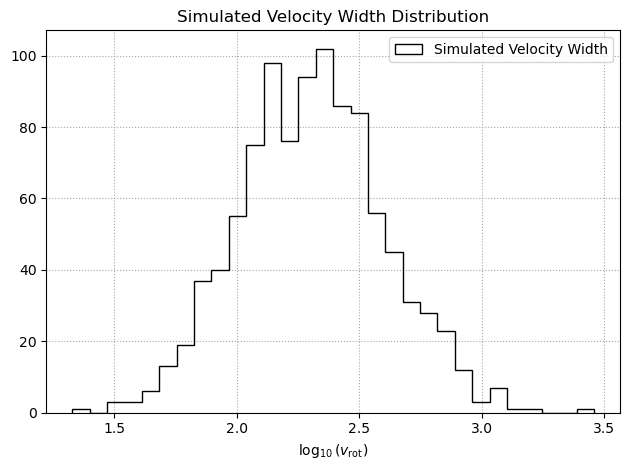

In [39]:
plt.hist(np.log10(simulated_data['velocity_width']), bins=30, alpha=1.0, histtype='step',color='black', label='Simulated Velocity Width')
plt.xlabel(r'$\log_{10}(v_{\text{rot}})$')
plt.grid(visible=True, which='both', color='0.65',linestyle=':')
plt.legend()
plt.title('Simulated Velocity Width Distribution')
plt.tight_layout()
plt.savefig('simulated_W.png')
plt.show()

In [29]:
sfi = pd.read_csv('/Users/uqksaida/Desktop/UQ_work/AI distance indicators/TF_symbolic_regression/input/SFI++.csv')
sfi

,pgc,Name,J2000,UGC/AGC,Alt_Name,RAJ,DeJ,Ty,r23.5,r83L,...,e_Vg,Ng,Na,Vpg,e_Vpg,Dg,Vpg_b,e_Vpgb,Dg_b,Int_ID
0,4,PGC000004,J000003.4+230516,331060,478-009b,00 00 03.4,+23 05 15,5,24.7,21.7,...,1.0,2.0,5.0,187.0,697.0,3882.0,-614.0,523.0,4683.0,NaN
1,55,UGC12898,J000037.4+333604,12898,NaN,00 00 37.4,+33 36 02,5,21.4,20.5,...,2.0,1.0,3.0,-1310.0,1348.0,5848.0,-1347.0,1376.0,5885.0,NaN
2,70,UGC12900,J000056.0+202017,12900,456-015,00 00 55.9,+20 20 17,5,46.3,37.4,...,2.0,1.0,2.0,-2104.0,1585.0,8528.0,-1376.0,1657.0,7800.0,NaN
3,73,ESO349-017,J000058.6-333643,36544,349 G 17,00 00 57.7,-33 36 47,5,35.3,29.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,76,UGC12901,J000058.9+285442,12901,499-035,00 00 58.9,+28 54 41,3,41.5,32.1,...,6.0,1.0,3.0,219.0,1174.0,6462.0,308.0,1444.0,6373.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5775,4126721,PGC4126721,J234146.4+254309,332110,s94,23 41 46.4,+25 43 09,6,14.9,14.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5776,4126737,PGC4126737,J025748.8-364201,22240,356 G 22,02 57 48.8,-36 42 01,5,72.6,56.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5777,4126741,PGC4126741,J231735.5-344730,35993,407 G 14,23 17 35.5,-34 47 30,5,44.2,32.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5778,4530467,SDSSJ121511.62,J121511.6-032636,520024,013-112,12 15 11.9,-03 26 34,6,40.0,32.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


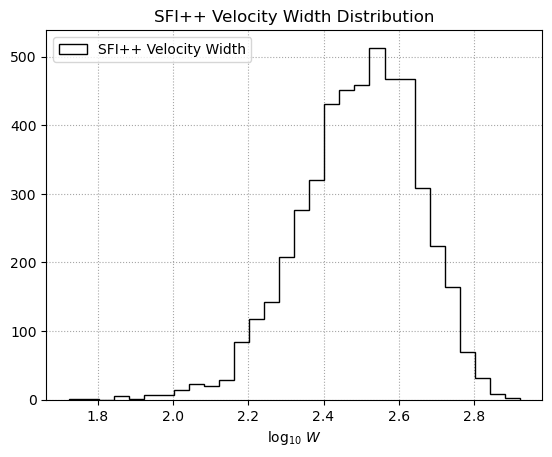

In [32]:
plt.hist(sfi['Wtf'], bins=30, alpha=1.0, histtype='step',color='black', label='SFI++ Velocity Width')
plt.xlabel(r'log$_{10}$ $W$')
plt.grid(visible=True, which='both', color='0.65',linestyle=':')
plt.legend()
plt.title('SFI++ Velocity Width Distribution')
plt.show()

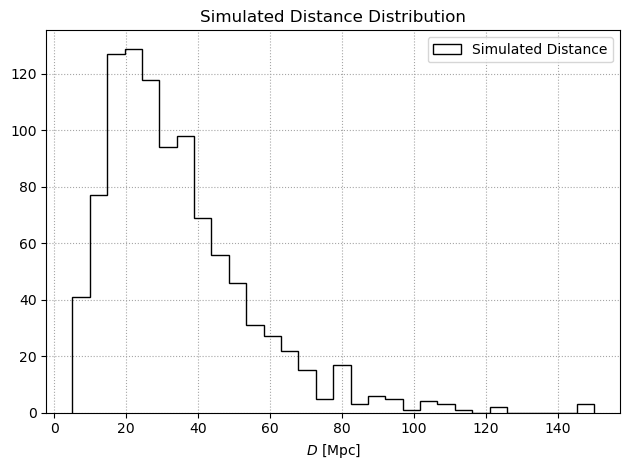

In [40]:
plt.hist(simulated_data['distance'], bins=30, alpha=1.0, histtype='step',color='black', label='Simulated Distance')
plt.xlabel(r'$D$' + r' [Mpc]')
plt.grid(visible=True, which='both', color='0.65',linestyle=':')
plt.legend()
plt.title('Simulated Distance Distribution')
plt.tight_layout()
plt.savefig('simulated_D.png')
plt.show()

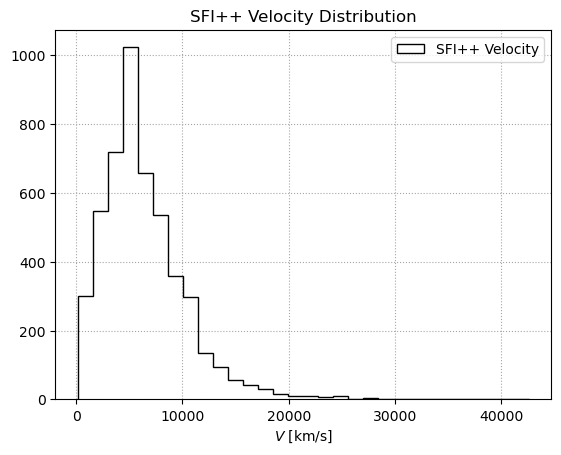

In [41]:
plt.hist(sfi['Vcmb'], bins=30, alpha=1.0, histtype='step',color='black', label='SFI++ Velocity')
plt.xlabel(r'$V$' + r' [km/s]')
plt.grid(visible=True, which='both', color='0.65',linestyle=':')
plt.legend()
plt.title('SFI++ Velocity Distribution')
plt.show()